Check PCair PCs vs Hannah's PCs

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
fn_pcair = '/data100t1/home/wanying/CCHC/lipidomics/input_docs/lipidomic_pca/CCHC_PCair.vectors'
fn_old_pc = '/data100t1/home/wanying/CCHC/doc/genotype_and_pc/202210_CCHC_PCs_id_fixed_1KG_controls_removed.txt'

df_pcair = pd.read_csv(fn_pcair, sep='\t', header=None).rename(columns={i:f'PC{i}' for i in range(1, 21)}).rename(columns={0:'IID'})
df_old_pc = pd.read_csv(fn_old_pc, sep='\t').set_index(keys='IID').reindex(index=df_pcair['IID']).reset_index().drop(columns=['FID', 'RRID', 'LABID'])

display(df_pcair.head(3))
display(df_old_pc.head(3))

,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,23,24,25,26,27,28,29,30,31,32
0,BA0185,-0.019882,-0.006616,0.010304,-0.000723,-0.003829,-0.001455,0.009577,0.002027,-0.004466,...,-0.001092,-0.007615,-0.003963,-0.019933,-0.020794,-0.005828,-0.013239,-0.008228,0.021499,0.018457
1,BD0009_BD4009,-0.018380,-0.068916,0.005953,0.003658,-0.010963,0.001570,0.006791,0.032535,-0.006654,...,-0.033953,0.001051,0.031248,-0.038346,0.013642,0.038489,0.008921,0.002822,0.029031,-0.011748
2,BD0010_BD4010,-0.007637,-0.007147,-0.003714,0.000468,-0.000608,0.002014,0.005038,0.001177,0.000948,...,0.008084,-0.009793,-0.003137,-0.006191,0.004313,0.006272,0.014789,-0.006254,-0.007646,-0.005085


,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,BA0185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BD0009_BD4009,0.010911,-0.075311,0.006324,0.020142,-0.009451,0.000486,0.013181,-0.060319,0.019934,...,0.033558,0.016166,-0.011626,-0.004915,-0.027296,0.021695,-0.02565,-0.016280,0.011051,0.000874
2,BD0010_BD4010,0.005709,-0.010439,0.009532,0.013398,-0.017452,0.007145,0.001099,-0.017577,0.037650,...,-0.004015,0.006671,-0.002186,0.005273,0.004189,0.019060,0.01778,0.028363,-0.022071,0.006308


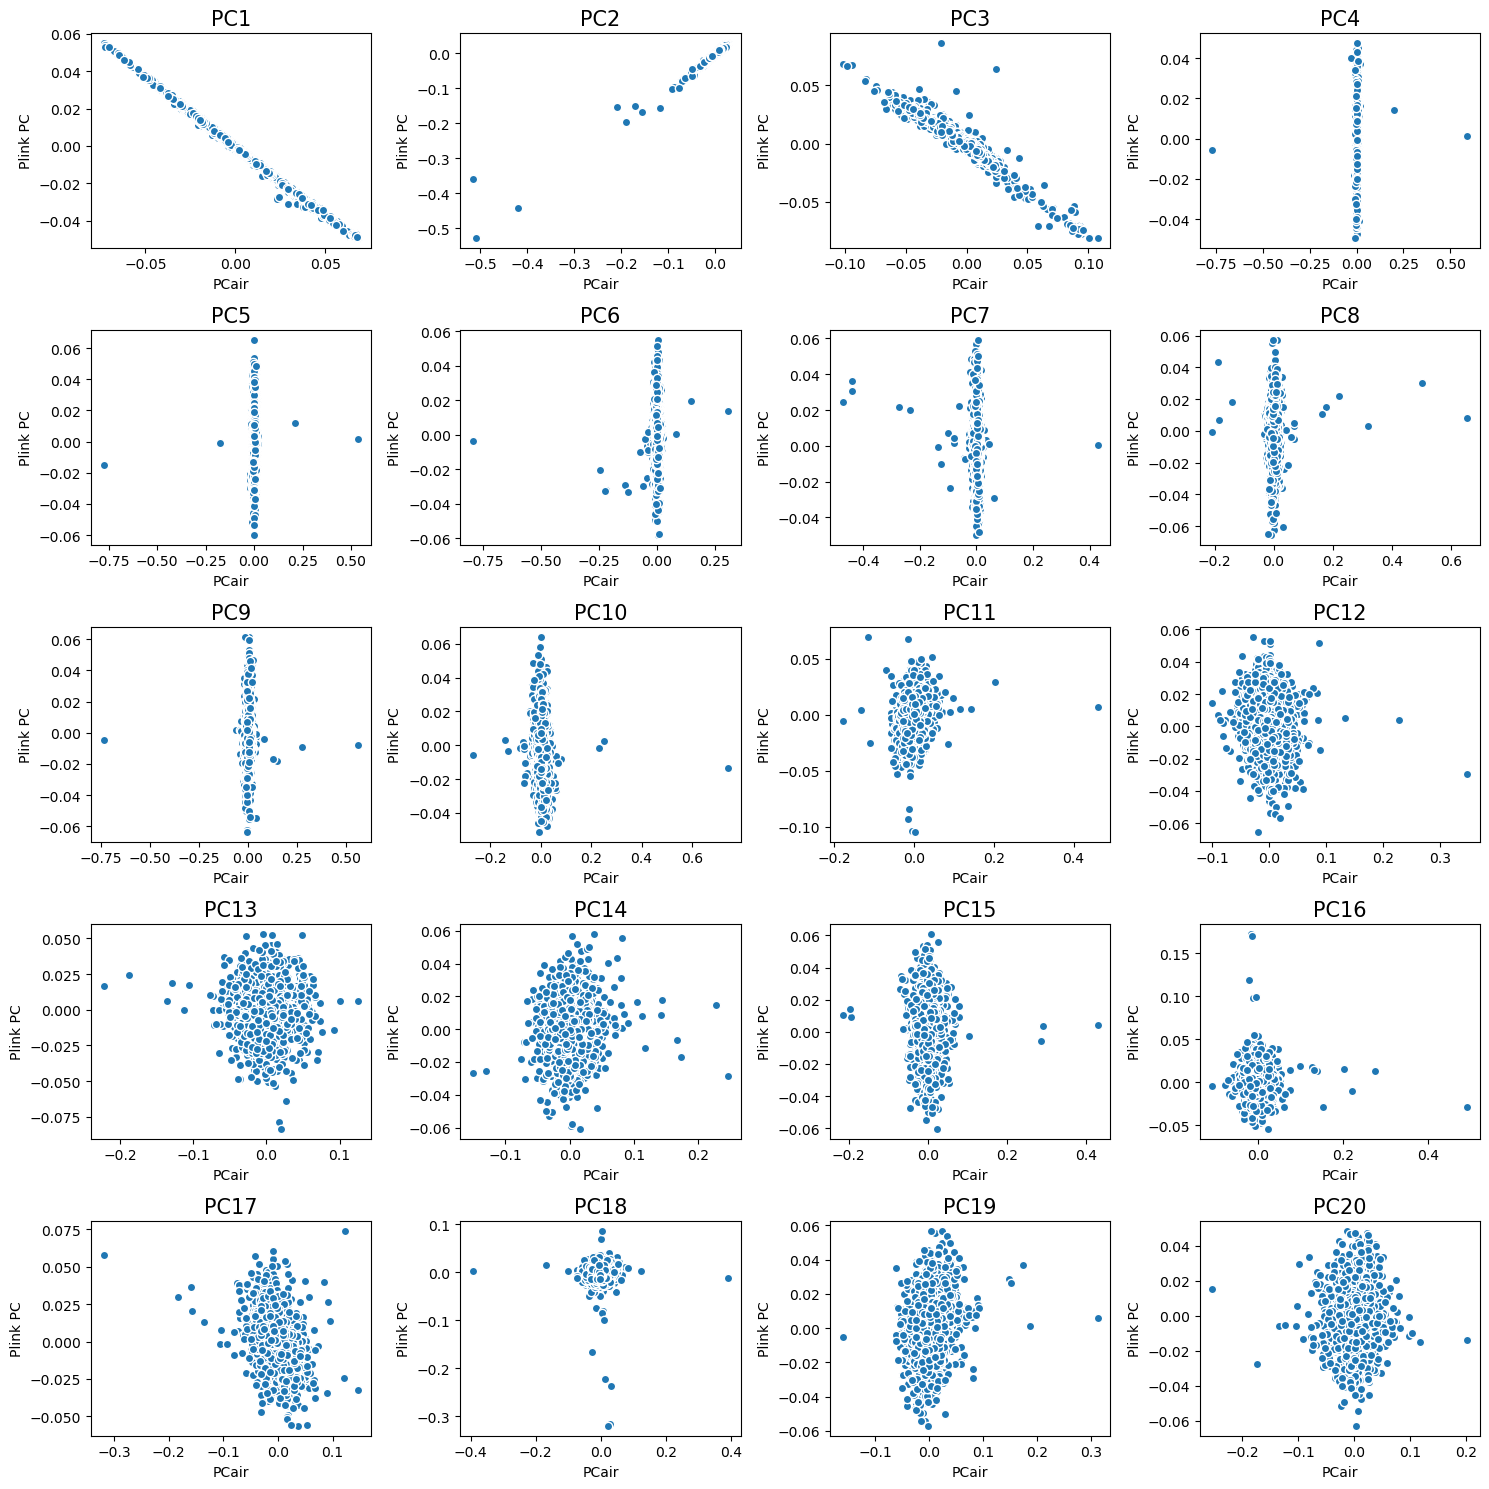

In [66]:
fig, axes = plt.subplots(5,4, figsize=(15,15), dpi=100)

for i, ax in enumerate(axes.flatten()):
    ax.scatter(df_pcair[f'PC{i+1}'], df_old_pc[f'PC{i+1}'], edgecolors='w', marker='o', lw=1)
    ax.set_title(f'PC{i+1}', fontsize=15)
    ax.set_xlabel('PCair')
    ax.set_ylabel('Plink PC')

fig.tight_layout()

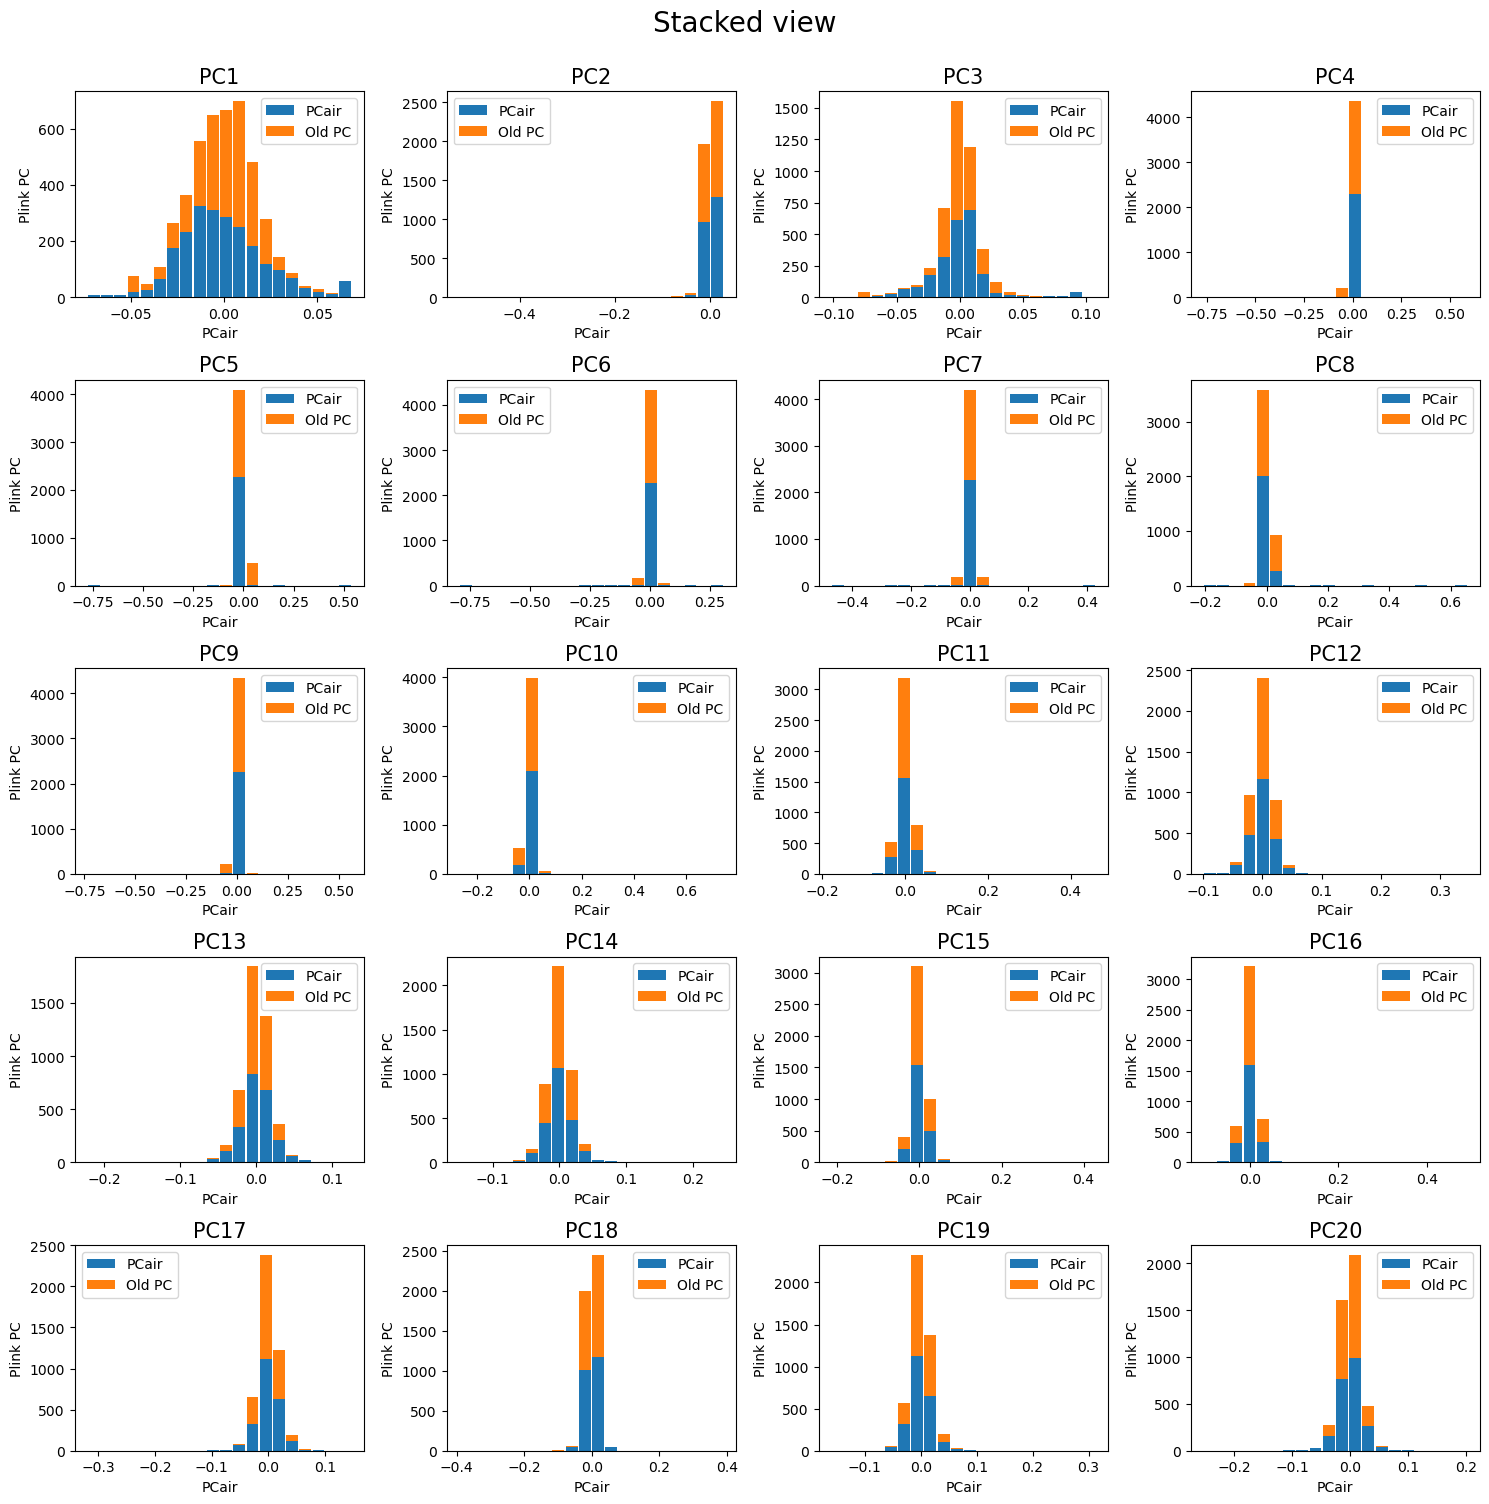

In [67]:
fig, axes = plt.subplots(5,4, figsize=(15,15), dpi=100)

for i, ax in enumerate(axes.flatten()):
    ax.hist([df_pcair[f'PC{i+1}'],df_old_pc[f'PC{i+1}']], bins=20, rwidth=0.9, label=['PCair', 'Old PC'], stacked=True)
    ax.set_title(f'PC{i+1}', fontsize=15)
    ax.set_xlabel('PCair')
    ax.set_ylabel('Plink PC')
    ax.legend()
fig.suptitle('Stacked view', fontsize=20, y=1)
fig.tight_layout()

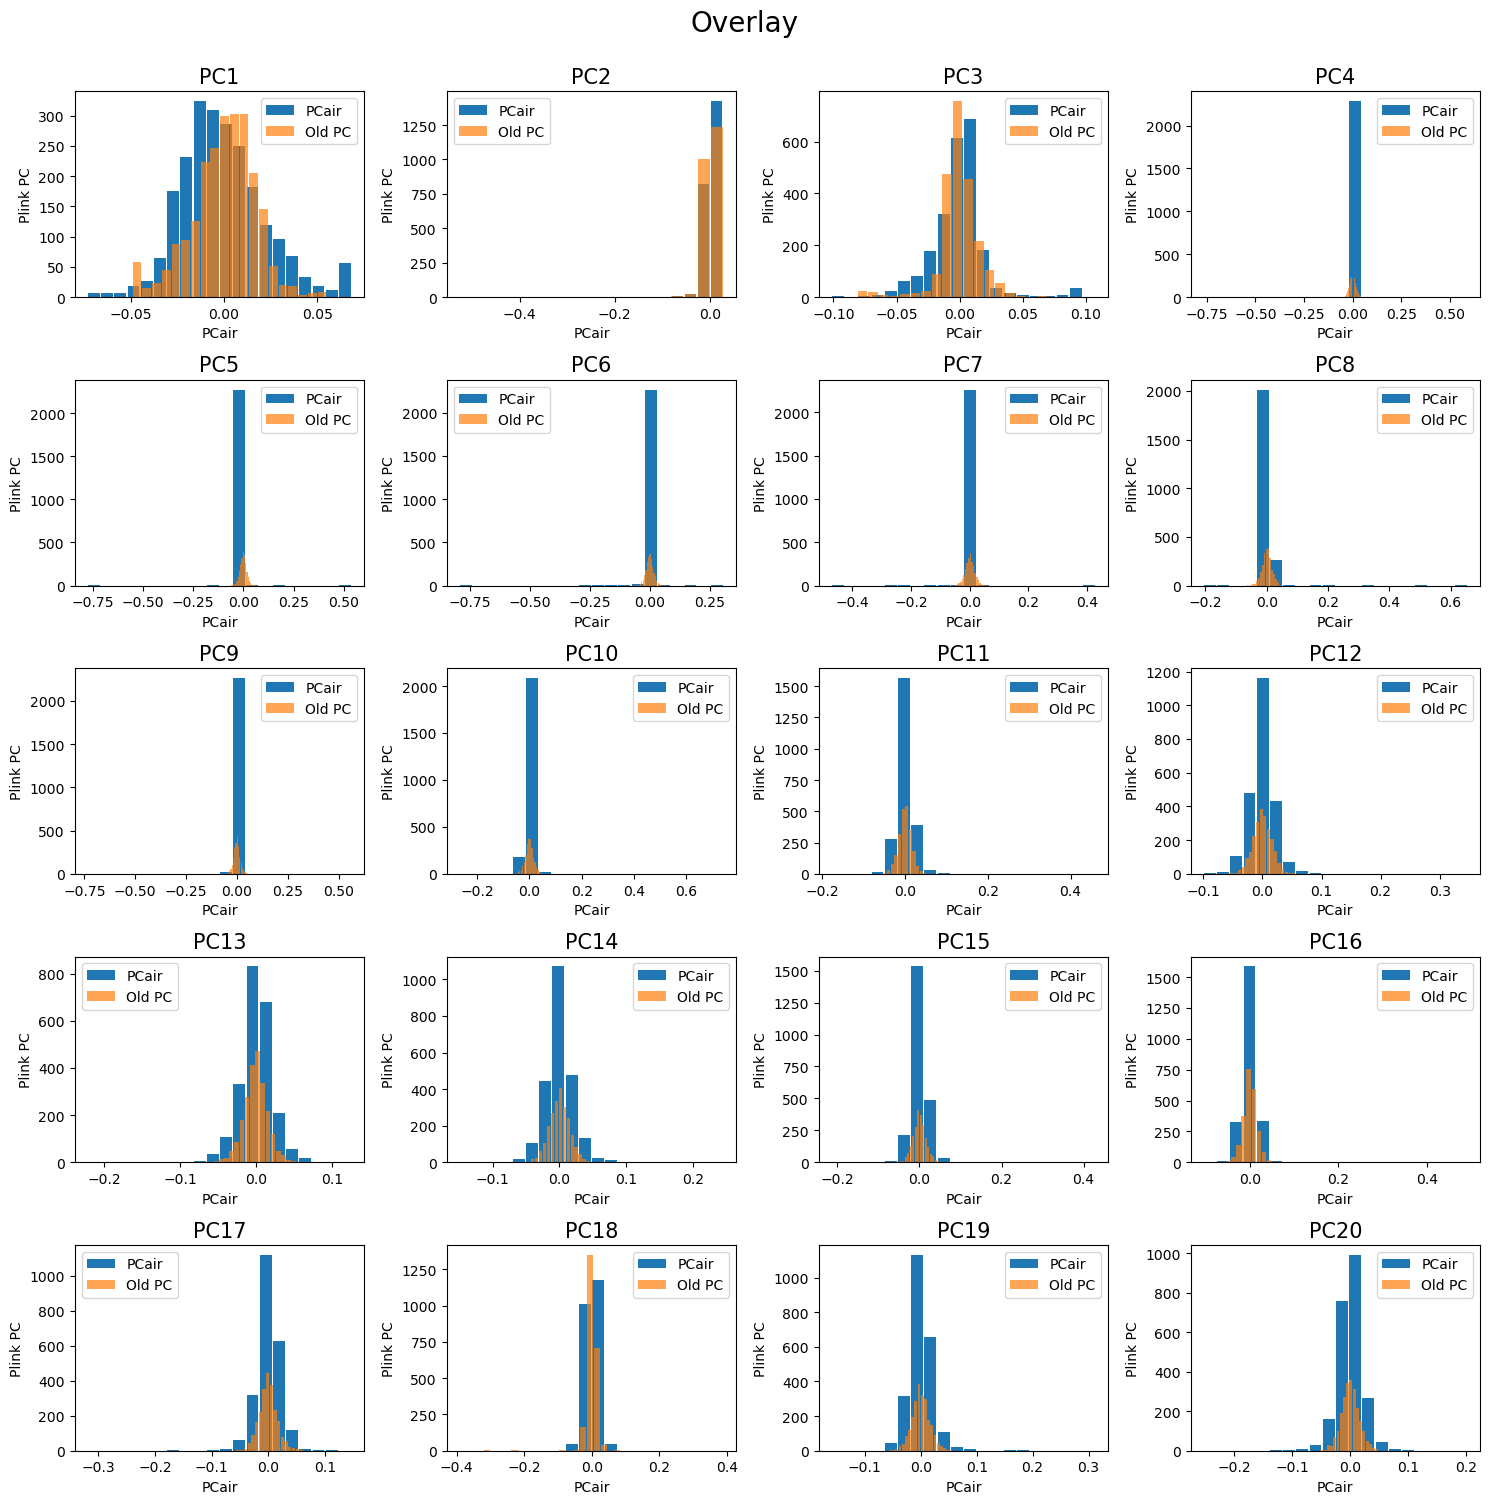

In [68]:
fig, axes = plt.subplots(5,4, figsize=(15,15), dpi=100)

for i, ax in enumerate(axes.flatten()):
    ax.hist(df_pcair[f'PC{i+1}'], bins=20, rwidth=0.9, label='PCair')
    ax.hist(df_old_pc[f'PC{i+1}'], bins=20, rwidth=0.9, label='Old PC', alpha=0.7)
    ax.set_title(f'PC{i+1}', fontsize=15)
    ax.set_xlabel('PCair')
    ax.set_ylabel('Plink PC')
    ax.legend()
    
fig.suptitle('Overlay', fontsize=20, y=1)
fig.tight_layout()